<a href="https://colab.research.google.com/github/joybratas1/Credit-Card-Fraud-Project/blob/main/CCFraud_%20Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter # counter takes values returns value_counts dictionary
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
import os

In [2]:
pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od
url_l='https://www.kaggle.com/mlg-ulb/creditcardfraud'
od.download(url_l)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joybratasarkar
Your Kaggle Key: ··········


 14%|█▎        | 9.00M/66.0M [00:00<00:00, 68.3MB/s]

100%|██████████| 66.0M/66.0M [00:00<00:00, 107MB/s] 


In [4]:
file_name='/content/creditcardfraud/creditcard.csv'
df= pd.read_csv(file_name)
df.dataframeName = 'European Credit card Fraud data.csv'
nRow, nCol = df.shape
print('There are {} rows and {} columns in our Dataset'.format(nRow,nCol))

There are 284807 rows and 31 columns in our Dataset


In [5]:
def reduce_memory(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

df = reduce_memory(df)

Memory usage of dataframe is 67.36 MB
Memory usage after optimization is: 17.11 MB
Decreased by 74.6%


In [6]:
vc = df['Class'].value_counts().to_frame().reset_index()
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(df), 2))
#vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})

print('No Frauds Cases are ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset i.e.', vc.iloc[0,1])
print('Frauds Cases are', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset i.e.', vc.iloc[1,1])

No Frauds Cases are  99.83 % of the dataset i.e. 284315
Frauds Cases are 0.17 % of the dataset i.e. 492


In [7]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100,stratify=y)

In [10]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()


In [11]:
X_train['Amount'] = rob_scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))

X_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
276544,2.019531,-0.099060,-1.123047,0.461670,-0.167358,-1.240234,0.219849,-0.311279,0.829590,-0.090515,-0.836426,0.263184,-0.536133,0.456299,0.231689,-0.322021,-0.268066,-0.595703,0.176147,-0.260010,-0.253662,-0.625488,0.289551,-0.001698,-0.139893,-0.585938,-0.016449,-0.048065,-0.071716
168089,-0.815918,-0.408203,-1.699219,-0.622070,0.273438,-0.498535,3.472656,-0.622559,-1.340820,-0.738281,0.343750,0.307129,-0.033081,0.944336,-1.416992,-0.429688,-0.626465,0.209351,0.271973,0.940430,0.718750,1.292969,0.696289,-0.340088,0.153442,0.866699,-0.099182,0.199829,6.621094
91651,-1.185547,1.182617,1.567383,-0.001388,-0.005512,-0.770508,0.738281,-0.090759,-0.246582,0.231323,0.611328,0.958984,1.365234,-0.294678,0.969238,-0.375000,-0.064758,-1.189453,-0.559082,0.210815,-0.252686,-0.234619,0.166748,0.623535,-0.245361,0.008331,-0.141479,-0.355225,-0.141235
258071,1.817383,-0.727539,-0.291504,0.459473,-0.895996,-0.273438,-0.683594,0.106567,1.052734,0.166870,0.730469,0.756348,-0.583008,0.108887,-0.273193,0.417236,-0.588867,0.466064,-0.098816,-0.109314,0.287598,0.865723,0.091492,0.070007,-0.322266,0.589355,-0.038666,-0.049530,0.670898
167236,-1.670898,-7.312500,-2.699219,0.667480,-3.021484,0.248047,1.533203,-0.518555,-0.097412,-0.171631,-0.779297,-0.744141,0.065796,0.137939,0.922852,1.761719,0.045166,-0.804688,-0.130981,4.019531,1.234375,-1.047852,-1.350586,0.794434,-1.232422,-0.680664,-0.369873,0.313232,27.687500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194533,-0.917480,0.855469,1.515625,-0.220703,0.747559,0.859375,0.827637,0.281494,0.400879,-1.066406,-2.439453,-0.765137,-1.608398,-0.233643,-1.497070,0.011734,-0.457764,-0.414795,-0.072083,-0.274170,-0.583984,-1.673828,-0.248779,-0.213989,0.609375,-1.054688,-0.068481,0.048981,0.173462
163532,-0.818848,-0.653809,1.685547,-1.561523,0.357422,1.305664,0.371826,-0.086060,-0.349609,0.156616,-0.675293,-1.141602,-0.944336,-0.998047,-0.265625,-0.894043,1.537109,-2.703125,0.337891,0.072693,0.248169,1.356445,-0.603516,-1.038086,0.609863,0.318604,-0.277344,-0.461914,1.102539
47169,0.984375,-0.951660,0.760742,0.729492,-1.429688,-0.353271,-0.542480,-0.063049,-0.419434,0.629883,-0.971191,-0.123718,0.026550,-0.172363,0.361328,-1.416016,-0.041656,1.488281,-1.164062,-0.233032,-0.148315,-0.163452,-0.190674,0.378174,0.456543,-0.239014,0.045746,0.061768,2.070312
138367,0.699707,-1.557617,0.286865,0.349609,-1.519531,-0.535645,-0.117676,-0.177246,-0.468506,0.452393,-0.967285,-0.115479,-0.277588,-0.071106,-0.190430,-1.633789,0.319336,0.736816,-0.609863,0.116943,-0.456787,-1.458984,-0.134644,0.368408,0.086121,0.273682,-0.065369,0.075745,4.429688


In [12]:
X_test['Amount'] = rob_scaler.transform(X_test['Amount'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 33)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [14]:
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Before SMOTE oversampling X_train shape= (213605, 29)
After SMOTE oversampling X_train shape= (426472, 29)


In [15]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, GridSearchCV

In [17]:
dt = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
dt.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
y_train_pred_DT = dt.predict(X_train_smote)

In [19]:
print(classification_report(y_train_smote, y_train_pred_DT))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_smote, y_train_pred_DT, rownames = ['True'], colnames = ['Predicted'], margins = True))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95    213236
           1       0.95      0.95      0.95    213236

    accuracy                           0.95    426472
   macro avg       0.95      0.95      0.95    426472
weighted avg       0.95      0.95      0.95    426472

Confusion Matrix - Training Dataset
Predicted       0       1     All
True                             
0          203126   10110  213236
1           11116  202120  213236
All        214242  212230  426472


In [20]:
y_test_DT_smote = dt.predict(X_test)

In [21]:
print(classification_report(y_test, y_test_DT_smote))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_test, y_test_DT_smote, rownames = ['True'], colnames = ['Predicted'], margins = True))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     71079
           1       0.03      0.85      0.06       123

    accuracy                           0.95     71202
   macro avg       0.52      0.90      0.52     71202
weighted avg       1.00      0.95      0.97     71202

Confusion Matrix - Training Dataset
Predicted      0     1    All
True                         
0          67759  3320  71079
1             19   104    123
All        67778  3424  71202


In [ ]:
roc_auc_score(y_train_smote.ravel(), y_train_pred_DT)

0.9502288544148269

In [ ]:
y_train_pred_proba_DT_smote = dt.predict_proba(X_train_smote)[:,1]

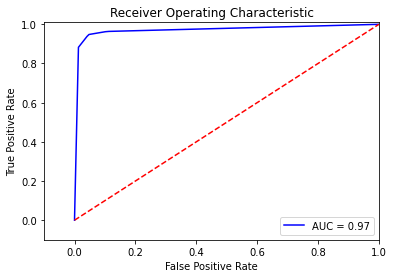

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_smote.ravel(),y_train_pred_proba_DT_smote)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### CATBOOST

In [24]:
!pip install catboost
from catboost import CatBoostClassifier

     |████████████████████████████████| 69.2 MB 5.1 kB/s 


In [25]:
cat_model = CatBoostClassifier(eval_metric='AUC', verbose=100)

In [26]:
cat_model.fit(X_train_smote, y_train_smote,eval_set=(X_test, y_test), use_best_model=True)

Learning rate set to 0.141414
0:	test: 0.9438783	best: 0.9438783 (0)	total: 275ms	remaining: 4m 34s
100:	test: 0.9635022	best: 0.9716973 (5)	total: 19.1s	remaining: 2m 49s
200:	test: 0.9661375	best: 0.9716973 (5)	total: 36.7s	remaining: 2m 26s
300:	test: 0.9661930	best: 0.9716973 (5)	total: 51.2s	remaining: 1m 58s
400:	test: 0.9661923	best: 0.9716973 (5)	total: 1m 5s	remaining: 1m 38s
500:	test: 0.9661923	best: 0.9716973 (5)	total: 1m 20s	remaining: 1m 20s
600:	test: 0.9663300	best: 0.9716973 (5)	total: 1m 34s	remaining: 1m 3s
700:	test: 0.9663300	best: 0.9716973 (5)	total: 1m 49s	remaining: 46.7s
800:	test: 0.9663298	best: 0.9716973 (5)	total: 2m 3s	remaining: 30.8s
900:	test: 0.9663271	best: 0.9716973 (5)	total: 2m 18s	remaining: 15.2s
999:	test: 0.9663259	best: 0.9716973 (5)	total: 2m 32s	remaining: 0us

bestTest = 0.9716972996
bestIteration = 5

Shrink model to first 6 iterations.


In [36]:
y_train_pred_smote_cat = cat_model.predict(X_train_smote)
y_test_CAT_smote =cat_model.predict(X_test)
pred_prob =cat_model.predict_proba(X_test)[:,1]
pred_prob_train= cat_model.predict_proba(X_train_smote)[:,1]

In [29]:
print(classification_report(y_train_smote, y_train_pred_smote_cat))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_smote, y_train_pred_smote_cat, rownames = ['True'], colnames = ['Predicted'], margins = True))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    213236
           1       0.98      0.95      0.97    213236

    accuracy                           0.97    426472
   macro avg       0.97      0.97      0.97    426472
weighted avg       0.97      0.97      0.97    426472

Confusion Matrix - Training Dataset
Predicted       0       1     All
True                             
0          209889    3347  213236
1            9775  203461  213236
All        219664  206808  426472


In [30]:
print(classification_report(y_test, y_test_CAT_smote))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_test, y_test_CAT_smote, rownames = ['True'], colnames = ['Predicted'], margins = True))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.09      0.85      0.16       123

    accuracy                           0.98     71202
   macro avg       0.54      0.92      0.58     71202
weighted avg       1.00      0.98      0.99     71202

Confusion Matrix - Training Dataset
Predicted      0     1    All
True                         
0          70010  1069  71079
1             19   104    123
All        70029  1173  71202


In [33]:
roc_auc_score(y_test, pred_prob)

0.9152444257317263

In [34]:
roc_auc_score(y_test,  y_test_CAT_smote)

0.9152444257317263

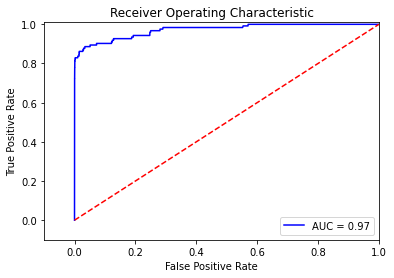

In [38]:
fpr, tpr, thresholds = roc_curve(y_test.ravel(),pred_prob)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LIGHT GBM

In [39]:
from lightgbm import LGBMClassifier

In [79]:
lgb_model= LGBMClassifier(n_jobs=-1,num_threads=16,max_depth=7, random_state=17)

In [80]:
lgb_model.fit(X_train_smote, y_train_smote)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, num_threads=16,
               objective=None, random_state=17, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [81]:
y_train_pred_smote_lgb = lgb_model.predict(X_train_smote)
y_test_LGB_smote =lgb_model.predict(X_test)
pred_prob_lgb =lgb_model.predict_proba(X_test)[:,1]
pred_prob_train_lgb= lgb_model.predict_proba(X_train_smote)[:,1]

In [82]:
print(classification_report(y_train_smote, y_train_pred_smote_lgb))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_smote, y_train_pred_smote_lgb, rownames = ['True'], colnames = ['Predicted'], margins = True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472

Confusion Matrix - Training Dataset
Predicted       0       1     All
True                             
0          212958     278  213236
1              42  213194  213236
All        213000  213472  426472


In [83]:
print(classification_report(y_test, y_test_LGB_smote))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_test, y_test_LGB_smote, rownames = ['True'], colnames = ['Predicted'], margins = True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.45      0.82      0.58       123

    accuracy                           1.00     71202
   macro avg       0.73      0.91      0.79     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix - Training Dataset
Predicted      0    1    All
True                        
0          70957  122  71079
1             22  101    123
All        70979  223  71202


In [84]:
roc_auc_score(y_test, pred_prob_lgb)

0.9709622306200693

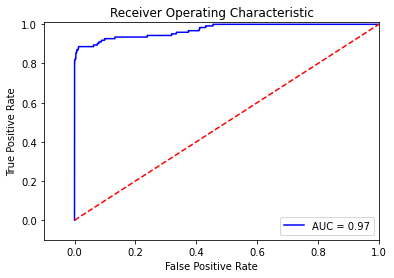

In [85]:
fpr, tpr, thresholds = roc_curve(y_test.ravel(),pred_prob_lgb)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### RANDOM FOREST CLASSIFIER

In [86]:
from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier() 

In [87]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
y_train_pred_smote_rfc = rfc.predict(X_train_smote)
y_test_RFC_smote =rfc.predict(X_test)
pred_prob_rfc =rfc.predict_proba(X_test)[:,1]
pred_prob_train_rfc= rfc.predict_proba(X_train_smote)[:,1]

In [89]:
print(classification_report(y_train_smote, y_train_pred_smote_rfc))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_smote, y_train_pred_smote_rfc, rownames = ['True'], colnames = ['Predicted'], margins = True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00    213236

    accuracy                           1.00    426472
   macro avg       1.00      1.00      1.00    426472
weighted avg       1.00      1.00      1.00    426472

Confusion Matrix - Training Dataset
Predicted       0       1     All
True                             
0          213236       0  213236
1               0  213236  213236
All        213236  213236  426472


In [90]:
print(classification_report(y_test, y_test_RFC_smote))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_test, y_test_RFC_smote, rownames = ['True'], colnames = ['Predicted'], margins = True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.93      0.80      0.86       123

    accuracy                           1.00     71202
   macro avg       0.96      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix - Training Dataset
Predicted      0    1    All
True                        
0          71071    8  71079
1             24   99    123
All        71095  107  71202


In [91]:
roc_auc_score(y_test, pred_prob_rfc)

0.9597768062262568

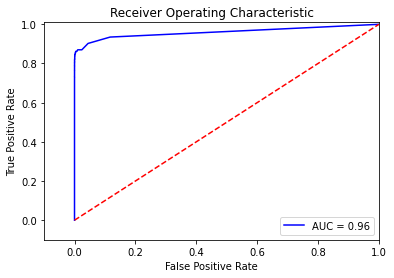

In [92]:
fpr, tpr, thresholds = roc_curve(y_test.ravel(),pred_prob_rfc)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()